In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

Celem tego notatnika jest przedstawienie podstawowych możliwości biblioteki Qiskit oraz typowej struktury programów pisanych przy jej użyciu.  

--- 
Biblioteka Qiskit składa się z wielu paczek i cały czas jest rozbudowywana i zmieniana. Podstawową paczką, która zawiera najważniejsze funkcjonalności jest **Qiskit Terra** i głównie na tej paczce będziemy się skupiać. Będziemy korzystać także z symulatora Aer, który jest rozwijany w ramach **Qiskit Aer**. Poza tym istnieje wiele paczek tworzonych pod konkretne zastosowania, np. **Qiskit Finance**, **Qiskit Machine Learning** czy **Qiskit Optimalization** (pełna lista jest dostępna pod adresem https://qiskit.github.io/ecosystem/#applications).

---

Zaczniemy od podstaw, czyli zawartości Qiskit Terra. Przejdziemy teraz przez prosty program, który inicjalizuje układ złożony z dwóch kubitów oraz dwóch bitów klasycznych, tworzy splątanie między dwoma kubitami, wykonuje pomiary na kubitach i zapisuje wyniki pomiarów w bitach klasycznych.  

Bity oraz kubity przechowywane będą w tzw. rejestrach - `QuantumRegister` oraz `ClassicalRegister`.   
Inicjalizacja rejestru to określenie zestawu kubitów lub klasycznych bitów, na których będziemy działać.  
Cały układ (kubity + bity + bramki kwantowe + urządzenia pomiarowe) będzie przedstawiany jako obwód kwantowy (`QuantumCircuit`). Inicjalizujemy obwód, podając ile kubitów i bitów wchodzi w skład tego obwodu.    

In [2]:
qr = QuantumRegister(2)     # inicjaliacja rejestru kwantowego - określenie liczby kubitów w układzie
cr = ClassicalRegister(2)   # inicjaliacja rejestru klasycznego - określenie liczby bitów w układzie

circuit = QuantumCircuit(qr, cr)    # obwód jest domyślnie inicjalizowany w stanie |0...0>, 
                                    # tzn. na początku każdy kubit jest w stanie |0>,
                                    # bity klasyczne również domyślnie mają wartość 0

Obwód możemy wyświetlić z różnymi ustawieniami. Na razie mamy same kubity i bity, w dalszych krokach można dodać bramki kwantowe oraz urządzenia pomiarowe.  

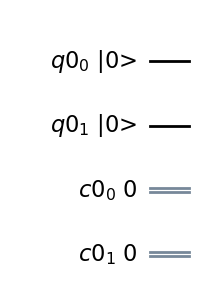

In [3]:
circuit.draw(initial_state=True, output="mpl", cregbundle=False)

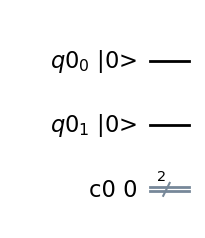

In [4]:
# Domyślnie Qiskit łączy na rysunku bity klasyczne (ClassicalRegister) 
# w jedną linię z adnotacją ile jest tam bitów - oszczędność miejsca na ekranie.

circuit.draw(initial_state=True, output="mpl")

Dodajmy do obwodu bramki, które będą działać na kubity i przekształcać ich stan w inny. Więcej informacji na temat bramek będziemy omawiać w notatniku `03_bramki_kwantowe.ipynb`.

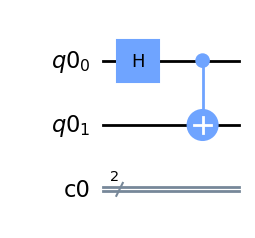

In [5]:
# Chcemy uzyskać stan splątany - najpierw działamy bramką Hadamarda, a następnie CNOT

circuit.h(0)            # bramka Hadamarda jest jednokubitowa - jako argument przyjmuje tylko 1 kubit 
                        # (a konkretnie indeksu kubitu, na który ma działać)

circuit.cx(0, 1)        # bramka CNOT działa na dwa kubity jednocześnie, jako argument podajemy dwa indeksy
                        # pierwszy indeks - control, drugi - target; jest to odpowiednik IF..., THEN...

circuit.draw(output="mpl")

Kolejnym etapem jest dodanie do obwodu aparatury pomiarowej. Na tym etapie dodajemy informację kiedy/gdzie będzie wykonywany pomiar oraz w którym bicie klasycznym zapisany zostanie wynik pomiaru na danym kubicie. Ważne jest to, że jeszcze nie wykonujemy właściwego mierzenia (żeby poznać wyniki pomiarów, trzeba będzie przeprowadzić symulację).  

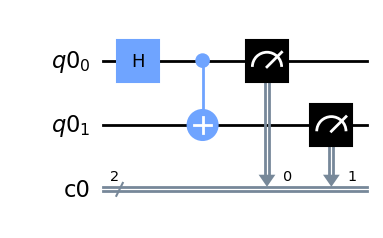

In [6]:
# Dodajemy pomiar do obwodu (na razie dodajemy informację jaki będzie pomiar, jeszcze nie wykonujemy właściwego mierzenia)

circuit.measure(qubit=[0,1], cbit=[0,1])    # określamy, że chcemy zmierzyć kubity [0,1]  (pierwszy argument)
                                            # i zapisać wyniki w klasycznych bitach [0,1] (drugi argument)
                                
circuit.draw(output='mpl')

Aby poznać wynik działania obwodu, trzeba puścić symulację. Można to zrobić lokalnie albo na komputerze kwantowym IBM, zakładając konto na https://quantum.ibm.com/ (w darmowej wersji niestety spore czasy czekania w kolejce).    

W tym notatniku użyjemy standardowego symulatora 'qasm_simulator', który ma za zadanie odtworzyć zachowanie prawdziwego urządzenia pomiarowego. Więcej na temat symulatorów będzie w notatniku `01_symulatory.ipynb`. Lista dostępnych symulatorów i ich własności jest on-line:  https://qiskit.github.io/qiskit-aer/tutorials/1_aer_provider.html

In [7]:
# Określenie, którego symulatora chcemy używać
simulator = Aer.get_backend('qasm_simulator')

# Przeprowadzenie symulacji
result = execute(circuit, backend=simulator).result()
result

Result(backend_name='qasm_simulator', backend_version='0.11.0', qobj_id='e7b1b081-051a-4794-8841-6bac57f8eae1', job_id='54fc94c8-dd4f-41b7-a175-96cc54aafae4', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 509, '0x3': 515}), header=QobjExperimentHeader(clbit_labels=[['c0', 0], ['c0', 1]], creg_sizes=[['c0', 2]], global_phase=0.0, memory_slots=2, metadata={}, n_qubits=2, name='circuit-78', qreg_sizes=[['q0', 2]], qubit_labels=[['q0', 0], ['q0', 1]]), status=DONE, seed_simulator=3010793655, metadata={'noise': 'ideal', 'batched_shots_optimization': False, 'measure_sampling': True, 'parallel_shots': 1, 'remapped_qubits': False, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'parallel_state_update': 12, 'sample_measure_time': 0.00068627, 'num_qubits': 2, 'device': 'CPU', 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'stabilizer', 'fusion': {'enabled': False}}, time_taken=0.002646758)], date=2024-03-16T12:36:13.86224

Jako wynik dostajemy złożony obiekt z wieloma informacjami. Aby wyświetlić wyniki pomiarów na obwodzie, należy skorzystać z metody `get_counts()`, która zwraca słownik z wynikami pomiarów.

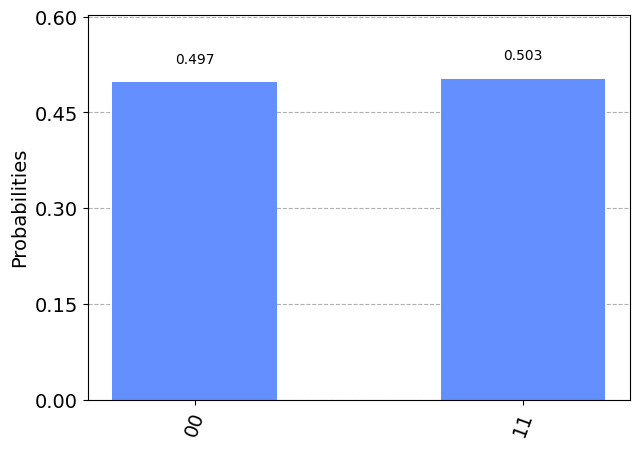

In [8]:
plot_histogram(result.get_counts(circuit))

Widzimy, że w pomiarach dostajemy idealnie skorelowane wyniki - pomiary obu kubitów dają zawsze ten sam wynik (albo oba dają wynik pomiaru "0", albo oba dają wynik "1"). Jest to efekt splątania kwantowego.  